#    EVALUATING MODEL PERFORMANCE TO CHOOSE THE BEST MODEL

In [2]:
#Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#Importing the dataset
df = pd.read_csv('Data.csv')
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


# FEATURES SELECTION

In [12]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# 1. Decision Tree Regression

In [13]:
X_d = X
y_d = y

#Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_d, y_d, test_size = 0.2, random_state = 0)


#Training the Decision Tree Regression model on the Training set

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)


#Predicting the Test set results
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

#Evaluating the Model Performance
from sklearn.metrics import r2_score
d_score = r2_score(y_test, y_pred)
print('The decision tree r2 score is: ', d_score)

[[431.37 431.23]
 [459.59 460.01]
 [460.06 461.14]
 ...
 [471.46 473.26]
 [437.76 438.  ]
 [462.74 463.28]]
The decision tree r2 score is:  0.9228349015829475


# 2. Multiple Linear Regression Model

In [15]:
X_m  = X
y_m = y

#Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_m, y_m, test_size = 0.2, random_state = 0)

#Training the Multiple Linear Regression model on the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


#Predicting the Test set results
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


#Evaluating the Model Performance
from sklearn.metrics import r2_score
m_score = r2_score(y_test, y_pred)
print('The Multiple Linear Regression r2 score is: ', m_score)

[[431.43 431.23]
 [458.56 460.01]
 [462.75 461.14]
 ...
 [469.52 473.26]
 [442.42 438.  ]
 [461.88 463.28]]
The Multiple Linear Regression r2 score is:  0.9325315554761303


# 3. Polynomial Regression Model

In [16]:
X_p = X
y_p = y
#Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_p, y_p, test_size = 0.2, random_state = 0)

#Training the Polynomial Regression model on the Training set¶
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)


#Predicting the Test set results
y_pred = regressor.predict(poly_reg.transform(X_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

#Evaluating the Model Performance
from sklearn.metrics import r2_score
p_score = r2_score(y_test, y_pred)
print('The Polynomial Regression r2 score is: ', p_score)

[[433.94 431.23]
 [457.9  460.01]
 [460.52 461.14]
 ...
 [469.53 473.26]
 [438.27 438.  ]
 [461.67 463.28]]
The Polynomial Regression r2 score is:  0.945819368318529


# 4. Random Forest Regression

In [34]:
#Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#Training the Random Forest Regression model on the whole dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

#Predicting the Test set results
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

#Evaluating the Model Performance
from sklearn.metrics import r2_score
ra_score = r2_score(y_test, y_pred)
print('The Random Forest Regression r2 score is: ', ra_score)

[[433.86 431.23]
 [458.42 460.01]
 [462.99 461.14]
 ...
 [469.36 473.26]
 [439.52 438.  ]
 [460.41 463.28]]
The Random Forest Regression r2 score is:  0.9616252843810529


# 5. SVM MODEL

In [20]:
X_s = X
y_s = y

#Reshaping y to 2d array
y_s = y_s.reshape(len(y),1)

#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size = 0.2, random_state = 0)


#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)


#Training the SVR model on the Training set
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)


#Predicting the Test set results
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)).reshape(-1,1))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

#Evaluating the Model Performance
from sklearn.metrics import r2_score
s_score = r2_score(y_test, y_pred)
print('The SVR r2 score is: ', s_score)

/Users/ojtaiwo/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[434.05 431.23]
 [457.93 460.01]
 [461.02 461.14]
 ...
 [470.6  473.26]
 [439.42 438.  ]
 [460.92 463.28]]
The SVR r2 score is:  0.9480795111869856


# Visualsing the model performance

In [29]:
model = pd.DataFrame([s_score, r_score, p_score, m_score, d_score])
columns = ['R Score']
model.columns = columns
model.head()

,R Score
0,0.948080
1,0.961625
2,0.945819
3,0.932532
4,0.922835


In [38]:
data = {
    'Model': ['SVR', 'Random Forest', 'Polynomial Reg', 'Multilinear Reg', 'Decision tree'],
    'R Score': [s_score, ra_score, p_score, m_score, d_score]}
model = pd.DataFrame(data)
model.head()

,Model,R Score
0,SVR,0.948080
1,Random Forest,0.961625
2,Polynomial Reg,0.945819
3,Multilinear Reg,0.932532
4,Decision tree,0.922835


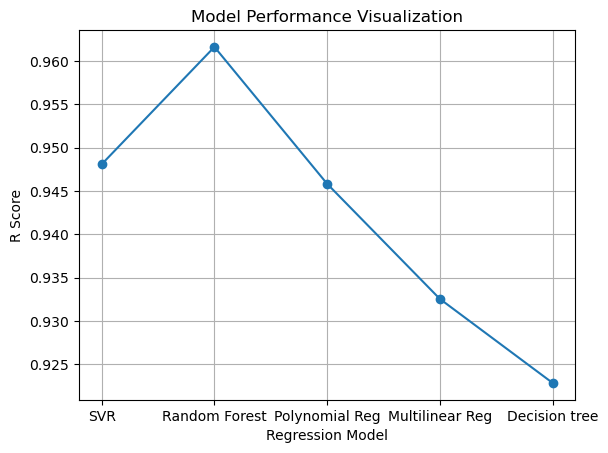

In [42]:
plt.plot(model['Model'], model['R Score'], marker='o', linestyle='-')
plt.xlabel('Regression Model')
plt.ylabel('R Score')
plt.title('Model Performance Visualization')
plt.grid(True)
plt.show()

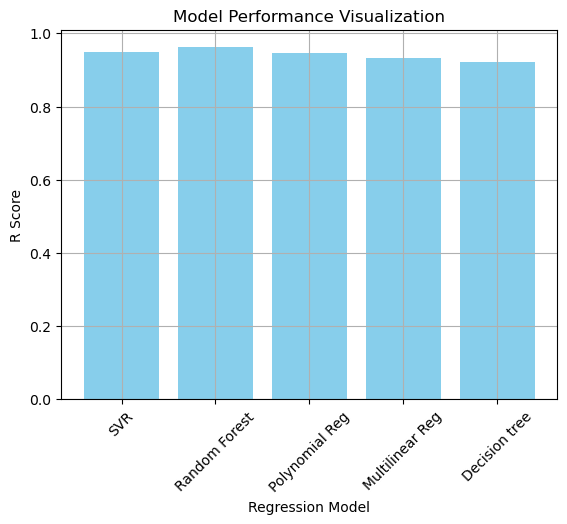

In [46]:
plt.bar(model['Model'], model['R Score'], color='skyblue')
plt.xlabel('Regression Model')
plt.ylabel('R Score')
plt.title('Model Performance Visualization')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Among the regression models evaluated, the Random Forest model exhibited superior performance, achieving the highest R score of 0.961625. This outstanding result underscores the effectiveness of the Random Forest algorithm in capturing complex patterns within the data and making accurate predictions. With its robustness to overfitting and ability to handle high-dimensional datasets, Random Forest emerges as a compelling choice for regression tasks, offering substantial predictive power and reliability.